<a href="https://colab.research.google.com/github/akulkarni14/SDL-Practicals/blob/main/S%26DL_PR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0, Loss: 1.017134
Epoch 100, Loss: 0.328438
Epoch 200, Loss: 0.316325
Epoch 300, Loss: 0.316112
Epoch 400, Loss: 0.316109
Epoch 500, Loss: 0.316109
Epoch 600, Loss: 0.316109
Epoch 700, Loss: 0.316109
Epoch 800, Loss: 0.316109
Epoch 900, Loss: 0.316109

Trained Model Parameters:
Slope (USD per inch): 0.75
Intercept (USD): -3.96

Mean Squared Error (normalized): 0.316109


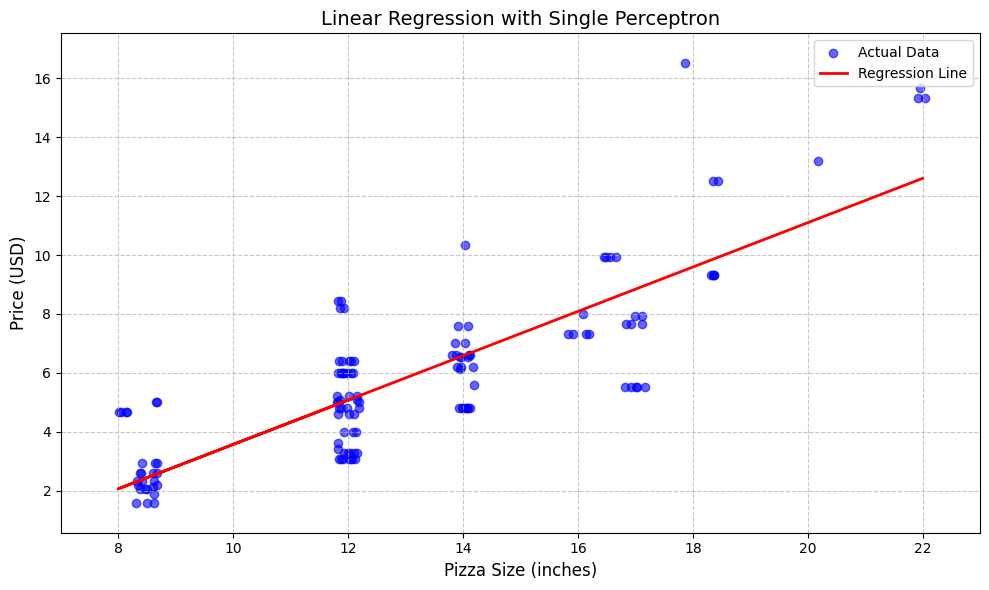


Predicted price for a 15-inch pizza: $7.33


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing function
def preprocess_data(file_path):
    # Load CSV data directly from file
    df = pd.read_csv(file_path)

    # Extract relevant columns
    df = df[['diameter', 'price_rupiah']].copy()

    # Clean price_rupiah (remove 'Rp' and commas) and convert to float
    df['price_rupiah'] = df['price_rupiah'].str.replace('Rp', '').str.replace(',', '').astype(float)

    # Convert to USD (1 USD = 15,000 IDR)
    df['price_usd'] = df['price_rupiah'] / 15000

    # Extract features (X) and target (y)
    X = df['diameter'].values
    y = df['price_usd'].values

    # Normalize features
    X_mean, X_std = np.mean(X), np.std(X)
    y_mean, y_std = np.mean(y), np.std(y)
    X_normalized = (X - X_mean) / X_std
    y_normalized = (y - y_mean) / y_std

    return X, y, X_normalized, y_normalized, X_mean, X_std, y_mean, y_std

# Single Perceptron class for linear regression
class SinglePerceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = np.random.randn(1) * 0.01  # Small random initialization
        self.bias = np.random.randn(1) * 0.01
        self.losses = []

    def predict(self, X):
        return X * self.weights + self.bias

    def train(self, X, y):
        for epoch in range(self.epochs):
            # Forward pass
            y_pred = self.predict(X)

            # Compute MSE loss
            loss = np.mean((y_pred - y) ** 2)
            self.losses.append(loss)

            # Compute gradients
            dW = np.mean(2 * (y_pred - y) * X)
            db = np.mean(2 * (y_pred - y))

            # Update weights and bias
            self.weights -= self.lr * dW
            self.bias -= self.lr * db

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.6f}")

    def get_params(self):
        return self.weights[0], self.bias[0]

# Load and preprocess data
file_path = 'pizza_v1.csv'
X, y, X_normalized, y_normalized, X_mean, X_std, y_mean, y_std = preprocess_data(file_path)

# Initialize and train the perceptron
model = SinglePerceptron(learning_rate=0.01, epochs=1000)
model.train(X_normalized, y_normalized)

# Get trained parameters
weights, bias = model.get_params()

# Denormalize weights for interpretation
slope = weights * y_std / X_std
intercept = (bias * y_std) + y_mean - (slope * X_mean)

print(f"\nTrained Model Parameters:")
print(f"Slope (USD per inch): {slope:.2f}")
print(f"Intercept (USD): {intercept:.2f}")

# Evaluate model
y_pred_normalized = model.predict(X_normalized)
mse = np.mean((y_pred_normalized - y_normalized) ** 2)
print(f"\nMean Squared Error (normalized): {mse:.6f}")

# Denormalize for plotting
y_pred = y_pred_normalized * y_std + y_mean

# Add jitter to X for plotting (visualization only)
np.random.seed(42)  # For reproducibility
X_jittered = X + np.random.uniform(-0.2, 0.2, size=X.shape)

# Plot results with styled output
plt.figure(figsize=(10, 6))  # Increase figure size for better visibility
plt.scatter(X_jittered, y, color='blue', label='Actual Data', alpha=0.6)
plt.plot(X, y_pred, color='red', label='Regression Line', linewidth=2)
plt.xlabel('Pizza Size (inches)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.title('Linear Regression with Single Perceptron', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.xlim(7, 23)  # Set x-axis limits to cover all diameters (8 to 22) with padding
plt.ylim(min(y) - 1, max(y) + 1)  # Set y-axis limits with padding
plt.xticks(np.arange(8, 23, 2))  # Set x-axis ticks every 2 inches
plt.tight_layout()
plt.show()

# Prediction function
def predict_price(size_inches):
    size_normalized = (size_inches - X_mean) / X_std
    price_normalized = model.predict(size_normalized)
    price_usd = price_normalized * y_std + y_mean
    return price_usd[0]

# Example prediction
size_example = 15
predicted_price = predict_price(size_example)
print(f"\nPredicted price for a {size_example}-inch pizza: ${predicted_price:.2f}")
